<a href="https://colab.research.google.com/github/MiguelEuripedes/embedded_AI/blob/main/Projects/first_image_classifier/cnn_classifier/data_segregation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your First Image Classifier: Using CNN to Classify Images

## Data Segregation

The purpose of this dataset is to correctly classify an image as containing a dog, cat, or panda. Containing only 3,000 images, the Animals dataset is meant to be another introductory dataset that we can quickly train a CNN model and obtain a comparative results with the previous KNN model.

Let's take the following steps:

1. Data segregation
2. Split clean data into train, validation and test

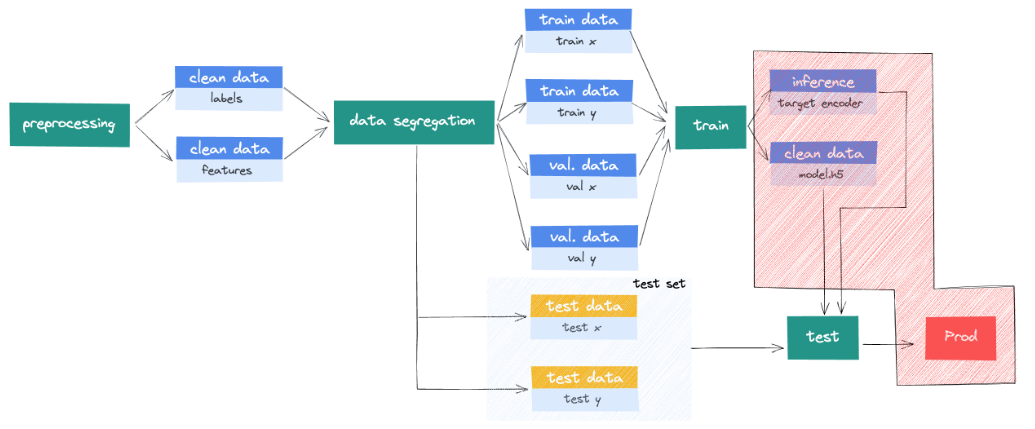

## Step 01: Setup

Start out by installing the experiment tracking library and setting up your free W&B account:

* **pip install wandb** – Install the W&B library
* **import wandb** – Import the wandb library
* **wandb login** – Login to your W&B account so you can log all your metrics in one place

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 4.5 MB/s 
     |████████████████████████████████| 182 kB 61.3 MB/s 
     |████████████████████████████████| 162 kB 57.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 162 kB 47.1 MB/s 
     |████████████████████████████████| 158 kB 54.0 MB/s 
     |████████████████████████████████| 157 kB 55.6 MB/s 
     |████████████████████████████████| 157 kB 49.5 MB/s 
     |████████████████████████████████| 157 kB 47.6 MB/s 
     |████████████████████████████████| 157 kB 57.5 MB/s 
     |████████████████████████████████| 157 kB 64.3 MB/s 
     |████████████████████████████████| 157 kB 39.1 MB/s 
     |████████████████████████████████| 157 kB 66.4 MB/s 
     |████████████████████████████████| 156 kB 46.5 MB/s 


### Import Packages

In [ ]:
# import the necessary packages
import logging
import joblib
from sklearn.model_selection import train_test_split
import wandb

In [ ]:
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# configure logging
# reference for a logging obj
logger = logging.getLogger()

# set level of logging
logger.setLevel(logging.INFO)

# create handlers
c_handler = logging.StreamHandler()
c_format = logging.Formatter(fmt="%(asctime)s %(message)s",datefmt='%d-%m-%Y %H:%M:%S')
c_handler.setFormatter(c_format)

# add handler to the logger
logger.handlers[0] = c_handler

## Step 02 Data Segregation

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
  "project_name": "cnn_classifier",
  "artifact_name_feature": "clean_features:latest",
  "artifact_name_target": "labels:latest",
  "train_feature_artifact": "train_x",
  "train_target_artifact": "train_y",
  "val_feature_artifact": "val_x",
  "val_target_artifact": "val_y",
  "test_feature_artifact": "test_x",
  "test_target_artifact": "test_y",
}

In [ ]:
# open the W&B project created in the Fetch step
run = wandb.init(entity="euripedes",project=args["project_name"], job_type="data_segregation")

logger.info("Downloading and reading clean data artifact")
clean_data = run.use_artifact(args["artifact_name_feature"])
clean_data_path = clean_data.file()

logger.info("Downloading and reading label data artifact")
label_data = run.use_artifact(args["artifact_name_target"])
label_data_path = label_data.file()

# unpacking the artifacts
data = joblib.load(clean_data_path)
label = joblib.load(label_data_path)

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


16-10-2022 19:11:46 Downloading and reading clean data artifact
16-10-2022 19:11:47 Downloading and reading label data artifact


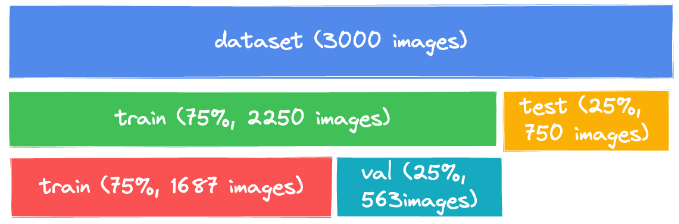

In [ ]:
# partition the data into training, test splits using 75% of
# the data for training and the remaining 25% for test
(train_x, test_x, train_y, test_y) = train_test_split(data, label,test_size=0.25, random_state=42)

In [ ]:
# partition the training into training, validation splits using 75% of
# the training set for training and the remaining 25% for validation
(train_x, val_x, train_y, val_y) = train_test_split(train_x, train_y,test_size=0.25, random_state=42)

In [ ]:
logger.info("Train x: {}".format(train_x.shape))
logger.info("Train y: {}".format(train_y.shape))
logger.info("Validation x: {}".format(val_x.shape))
logger.info("Validation y: {}".format(val_y.shape))
logger.info("Test x: {}".format(test_x.shape))
logger.info("Test y: {}".format(test_y.shape))

16-10-2022 19:11:52 Train x: (1687, 32, 32, 3)
16-10-2022 19:11:52 Train y: (1687,)
16-10-2022 19:11:52 Validation x: (563, 32, 32, 3)
16-10-2022 19:11:52 Validation y: (563,)
16-10-2022 19:11:52 Test x: (750, 32, 32, 3)
16-10-2022 19:11:52 Test y: (750,)


In [ ]:
# Save the artifacts using joblib
joblib.dump(train_x, args["train_feature_artifact"])
joblib.dump(train_y, args["train_target_artifact"])
joblib.dump(val_x, args["val_feature_artifact"])
joblib.dump(val_y, args["val_target_artifact"])
joblib.dump(test_x, args["test_feature_artifact"])
joblib.dump(test_y, args["test_target_artifact"])

logger.info("Dumping the train and validation data artifacts to the disk")

16-10-2022 19:11:55 Dumping the train and validation data artifacts to the disk


In [ ]:
# train_x artifact
artifact = wandb.Artifact(args["train_feature_artifact"],
                          type="TRAIN_DATA",
                          description="A json file representing the train_x"
                          )

logger.info("Logging train_x artifact")
artifact.add_file(args["train_feature_artifact"])
run.log_artifact(artifact)

16-10-2022 19:11:58 Logging train_x artifact


In [ ]:
# train_y artifact
artifact = wandb.Artifact(args["train_target_artifact"],
                          type="TRAIN_DATA",
                          description="A json file representing the train_y"
                          )

logger.info("Logging train_y artifact")
artifact.add_file(args["train_target_artifact"])
run.log_artifact(artifact)

16-10-2022 19:12:00 Logging train_y artifact


In [ ]:
# val_x artifact
artifact = wandb.Artifact(args["val_feature_artifact"],
                          type="VAL_DATA",
                          description="A json file representing the val_x"
                          )

logger.info("Logging val_x artifact")
artifact.add_file(args["val_feature_artifact"])
run.log_artifact(artifact)

16-10-2022 19:12:01 Logging val_x artifact


In [ ]:
# val_y artifact
artifact = wandb.Artifact(args["val_target_artifact"],
                          type="VAL_DATA",
                          description="A json file representing the val_y"
                          )

logger.info("Logging val_y artifact")
artifact.add_file(args["val_target_artifact"])
run.log_artifact(artifact)

16-10-2022 19:12:04 Logging val_y artifact


In [ ]:
# test_x artifact
artifact = wandb.Artifact(args["test_feature_artifact"],
                          type="TEST_DATA",
                          description="A json file representing the test_x"
                          )

logger.info("Logging test_x artifact")
artifact.add_file(args["test_feature_artifact"])
run.log_artifact(artifact)

16-10-2022 19:12:05 Logging test_x artifact


In [ ]:
# test_y artifact
artifact = wandb.Artifact(args["test_target_artifact"],
                          type="TEST_DATA",
                          description="A json file representing the test_y"
                          )

logger.info("Logging test_y artifact")
artifact.add_file(args["test_target_artifact"])
run.log_artifact(artifact)

16-10-2022 19:12:07 Logging test_y artifact


In [ ]:
run.finish()